In [1]:
import pandas as pd

data_path = "../data/raw/higgs-challenge.csv.gz"
df = pd.read_csv(data_path, compression="gzip")
df.set_index("EventId", inplace=True)
df.drop(["KaggleSet", "KaggleWeight"], axis=1, inplace=True)
classes = df["Label"].unique()

C:\Users\mirxm\AppData\Local\Temp\ipykernel_8184\1555283781.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


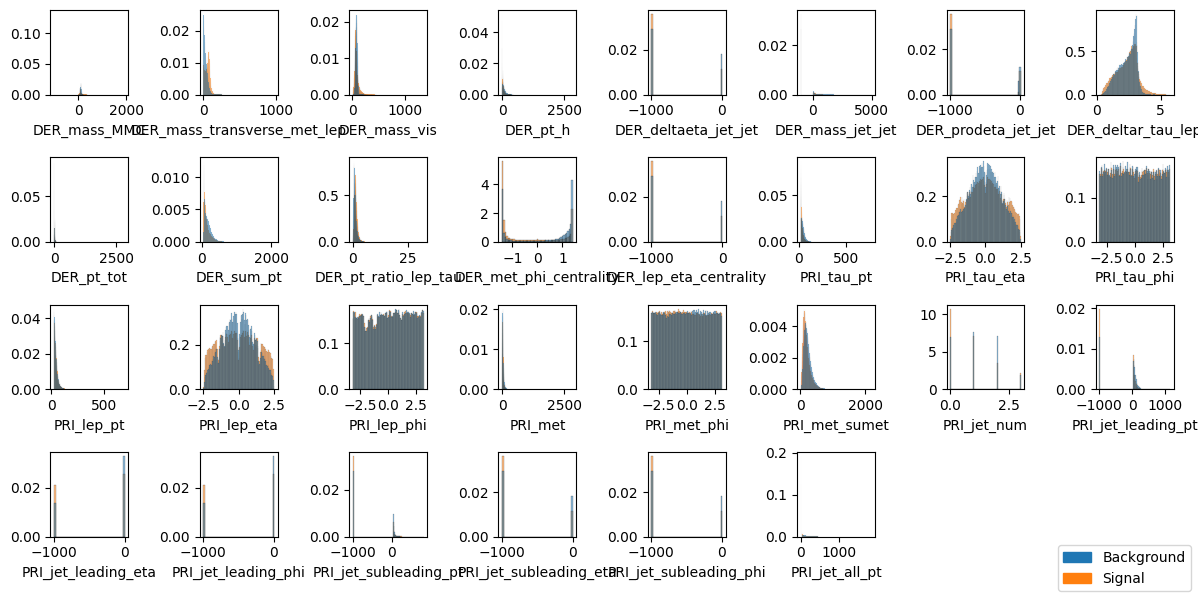

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
import math

nrows = 4
ncols = math.ceil(len(df.columns) / nrows)
fig, ax = plt.subplots(figsize=(12, 6), ncols=ncols, nrows=nrows)
for j, feature in enumerate(df.columns):
    ax_index = np.s_[j // ncols, j % ncols]
    if feature in ["Label", "Weight"]:
        # Delete the unused axes
        fig.delaxes(ax[ax_index])
        continue
    sns.histplot(
        df,
        x=feature,
        hue="Label",
        alpha=0.5,
        ax=ax[ax_index],
        stat="density",
        common_norm=False,  # If true, the total will sum to 1, otherwise each distribution sums to 1
        legend=False,
    )
    ax[ax_index].set_ylabel("")

# fig.subplots_adjust(hspace=0.5)
fig.tight_layout()
# Add create the custom legend
handles = [
    Patch(color=sns.color_palette()[0], label="Background"),
    Patch(color=sns.color_palette()[1], label="Signal"),
]
fig.legend(handles=handles, loc="lower right", bbox_transform=fig.transFigure)
fig.savefig("../plots/distribution-comparisons.png", dpi=300)
fig.show()